# Import

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
import re

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
load_dotenv() 
DATASET_FOLDER = os.getenv('DATASET_FOLDER')

In [4]:
raw_df = pd.read_csv(f"{DATASET_FOLDER}/Food_Establishment_Inspection_Data.csv")

/tmp/ipykernel_43342/3624628935.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(f"{DATASET_FOLDER}/Food_Establishment_Inspection_Data.csv")


# Data Wrangling

In [5]:
cols = { k:k.replace(' ','_').lower() for k in raw_df.keys()}
cols
pre_df = raw_df.rename(columns=cols)

In [6]:
# pre_df = pre_df.dropna()

In [7]:
pre_df.city=pre_df.city.str.upper()

In [8]:
pre_df.drop(['program_identifier','inspection_business_name','inspection_serial_num','violation_record_id','business_id'], axis=1);

In [59]:
pre_df["inspection_date"]=pd.to_datetime(pre_df["inspection_date"])

pre_df['weekday'] = pre_df.inspection_date.dt.day_name()


In [60]:
df = pre_df.reindex()

In [61]:
# Fix wrong longitude 
df.loc[df['longitude'] > 122, 'longitude'] *=-1

In [62]:
uniques = {}
uniques_count={}
df.apply(
    (
        lambda x: (uniques.update(
            {x.name:x.unique()}
        ),
          uniques_count.update(
              {x.name:len(x.unique())} 
          ))
    ),
    axis=0)
df_uniques = pd.DataFrame.from_dict(uniques_count, orient='index', columns=['Count'])
df_uniques = df_uniques.sort_values(by='Count', ascending=False)
# df_uniques

## deleting useless col


In [63]:

not_valid_inspection_result_rows=pre_df[(pre_df.inspection_result !='Unsatisfactory') & (pre_df.inspection_result !='Complete') &
(pre_df.inspection_result !='Incomplete') & (pre_df.inspection_result !='Satisfactory')
]
pre_df.drop(not_valid_inspection_result_rows.index, inplace=True)


In [64]:
df = df.drop('zip_code',axis=1)
#same name
df = df.drop(['program_identifier','inspection_business_name'],axis=1)
#low human readability
df = df.drop(['business_id','inspection_serial_num','violation_record_id'],axis=1)


In [65]:
# relation = df[['name','inspection_date','description','inspection_type','inspection_score','inspection_result','inspection_closed_business','violation_type','violation_description','violation_points','grade']]

In [66]:
# relation['violation_description'].unique()

In [67]:
# relation['description'].unique()

In [68]:
# relation[['inspection_result','violation_description']].head(50)

In [69]:
# relation['inspection_result'].unique()

In [70]:
# relation[['name','inspection_date','violation_points','inspection_score','grade','description']]

In [71]:
df['Risk_category'] = df['description'].apply(lambda x: str(re.findall(r'Risk.*',x)).replace('[','').replace(']','').replace("'",''))

In [72]:
df['description'] = df['description'].apply(lambda x: str(re.findall(r'(.*)Risk.*',x)).replace('[','').replace(']','').replace("'",'')[:-2])

In [73]:
df['violation_description_code'] = df['violation_description'].apply(lambda x: re.findall(r'(\d*).*',str(x))[0])

In [74]:
df['violation_description_type'] = df['violation_description'].apply(lambda x: re.findall(r'\d*(.*)',str(x))[0].replace("-","").strip())

In [75]:
df.Risk_category.unique()


array(['Risk Category III', 'Risk Category II', 'Risk Category I', '',
       'Risk II'], dtype=object)

<Axes: xlabel='grade', ylabel='inspection_score'>

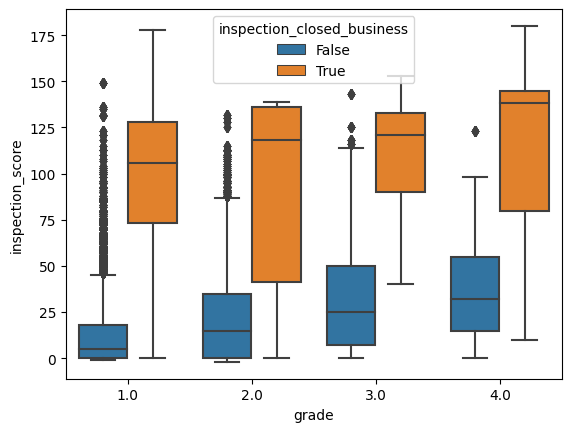

In [45]:
sns.boxplot( x=df["grade"], y=df["inspection_score"],hue=df['inspection_closed_business'] )

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

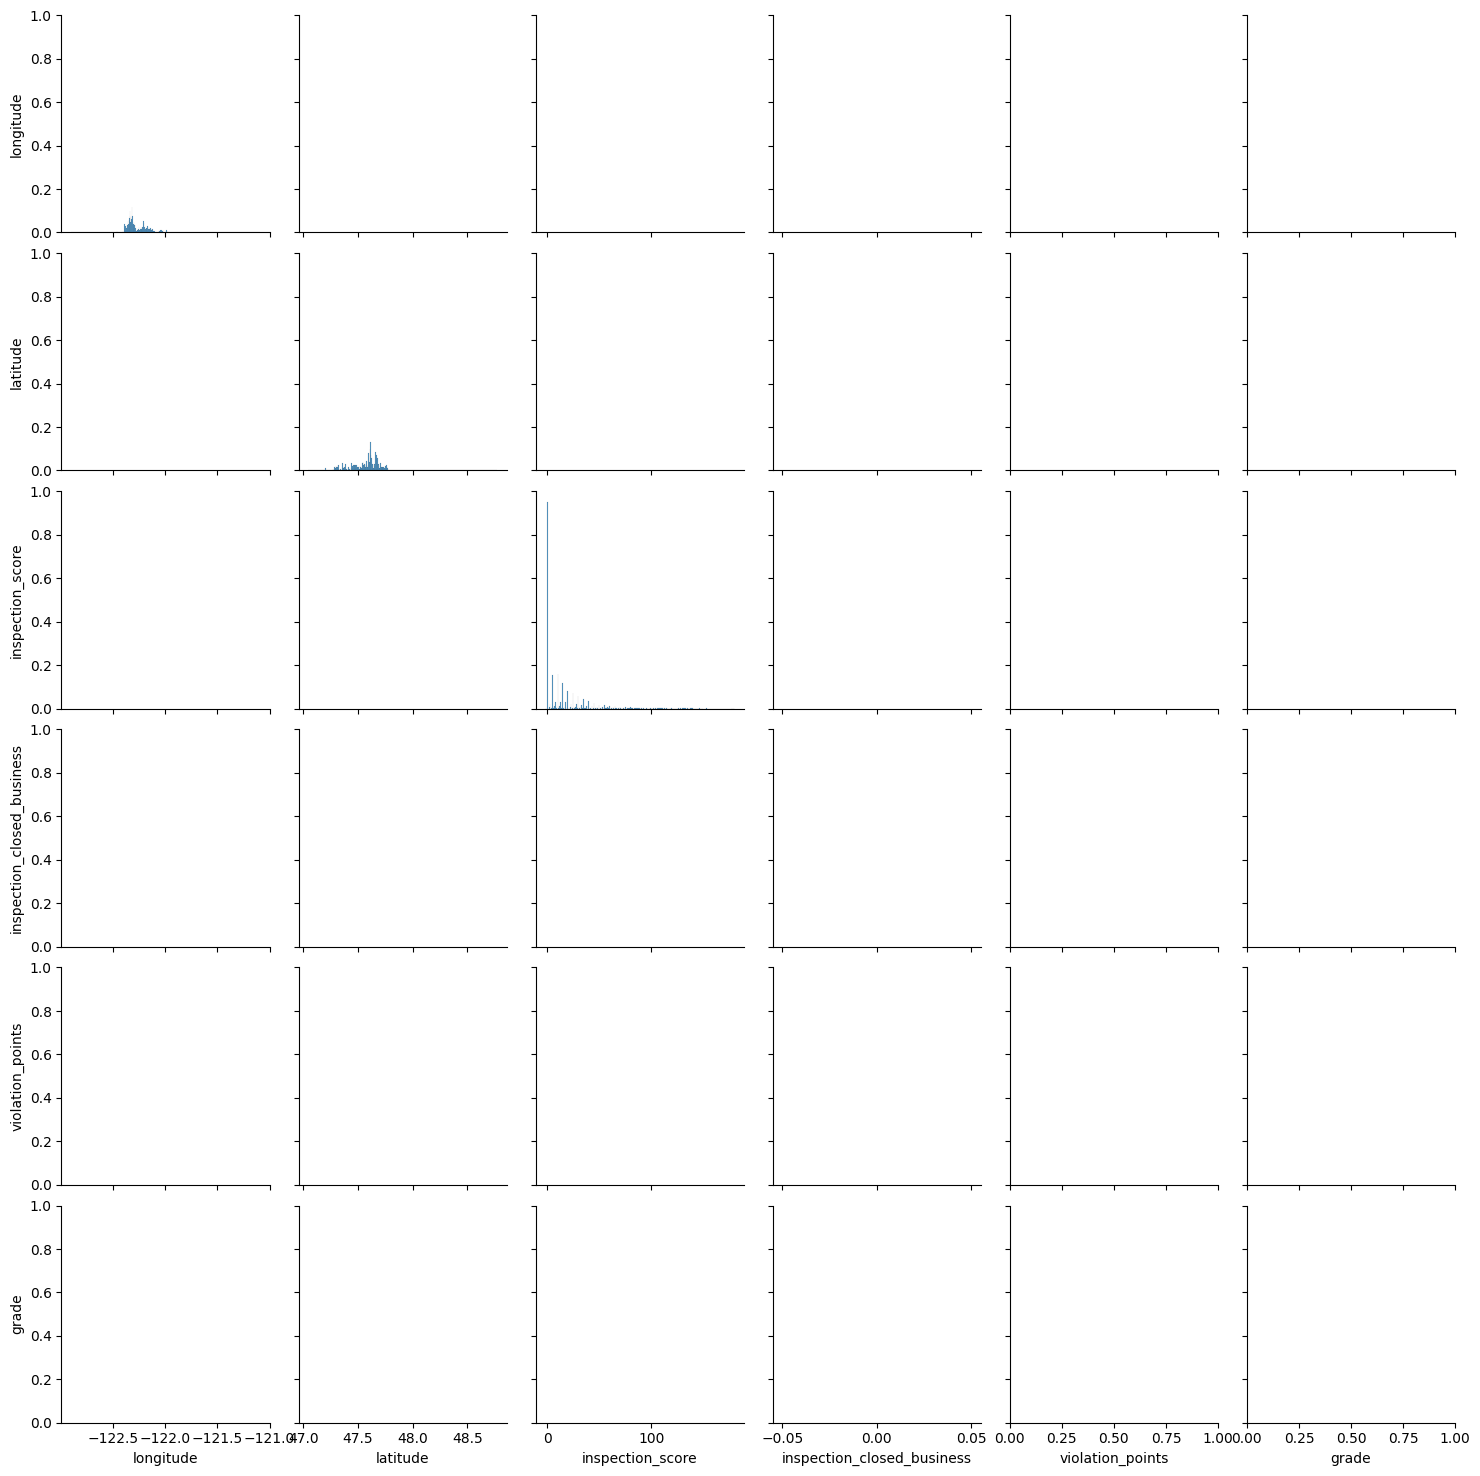

In [54]:
sns.pairplot(df)